In [1]:
import tensorflow as tf 
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')
    
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

2022-04-18 12:06:17.733907: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-18 12:06:20.569499: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 12:06:20.572967: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-18 12:06:20.667243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-18 12:06:20.667808: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1070


In [2]:
import pandas as pd 

df = pd.read_csv('CSVFiles/btc_prices_added.csv')

In [5]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)

In [18]:
# for index, row in df.iterrows():
#     if row['positive_tweets'] == 0:
#         df.drop(index, inplace=True)

# total_tweets = [] 
# for index, row in df.iterrows():
#     total_tweets.append(row['positive_tweets']+row['negative_tweets']+row['neutral_tweets'])
    
# df['total_tweets'] = total_tweets

percentage_changes = [] 
for index, row in df.iterrows():
    percentage_changes.append((row['Open-Close-Change']/row['Open'])*100)
    
df['percentage_changes'] = percentage_changes
df

,Open,Close,Volume,Quote-Asset-Volume,Number-Of-Trades,Taker-Buy-Base-Asset-Volume,Date,positive_tweets,negative_tweets,neutral_tweets,Volume-Change,Quote-Asset-Volume-Change,Open-Close-Change,total_tweets,percentage_changes
1,33517.99,33810.38,2067.782193,6.882214e+07,31324,934.880535,2021-07-02,7477,1482,8830,-222.235052,-8.156175e+06,293,17789,0.874157
2,33788.75,34681.43,1636.163798,5.629204e+07,26629,653.974646,2021-07-03,12093,1736,11601,-431.618395,-1.253010e+07,893,25430,2.642891
3,34685.34,35290.65,1306.070398,4.614279e+07,23008,663.827796,2021-07-04,10213,1498,11376,-330.093400,-1.014925e+07,605,23087,1.744253
4,35280.25,33743.42,2082.537602,7.081936e+07,33860,969.151893,2021-07-05,11820,1677,12484,776.467204,2.467657e+07,-1537,25981,-4.356545
15,31872.07,31374.74,1843.897641,5.849592e+07,43934,937.432244,2021-07-16,576,107,427,-351.935524,-1.149158e+07,-498,1110,-1.562497
16,31378.63,31509.98,1369.579999,4.319563e+07,34288,503.365858,2021-07-17,7269,1201,6734,-474.317642,-1.530029e+07,131,15204,0.417482
17,31519.62,31782.76,1428.174778,4.531400e+07,30625,526.293000,2021-07-18,13998,1712,10529,58.594779,2.118376e+06,263,26239,0.834401
18,31786.78,30828.98,1935.711841,6.011239e+07,35453,739.554305,2021-07-19,14377,2391,12163,507.537063,1.479838e+07,-958,28931,-3.013832
19,30832.11,29793.63,2982.969645,8.880886e+07,45562,1511.197298,2021-07-20,13521,2862,14550,1047.257804,2.869648e+07,-1039,30933,-3.369863
20,29795.90,32128.31,3712.687393,1.168412e+08,59579,1772.270575,2021-07-21,17769,2677,18465,729.717748,2.803238e+07,2333,38911,7.829936


In [27]:
df.to_csv('CSVFiles/btc_prices_added_more.csv')

In [19]:
# spearman rank correlation coefficient for monotomic relationship 
my_r = df.corr(method="spearman")
print(my_r)

                                 Open     Close    Volume  Quote-Asset-Volume  \
Open                         1.000000  0.973684  0.060218            0.424372   
Close                        0.973684  1.000000  0.105974            0.464912   
Volume                       0.060218  0.105974  1.000000            0.900901   
Quote-Asset-Volume           0.424372  0.464912  0.900901            1.000000   
Number-Of-Trades             0.347084  0.390469  0.873163            0.939308   
Taker-Buy-Base-Asset-Volume  0.155287  0.193931  0.965149            0.924135   
positive_tweets              0.123281  0.159554  0.083452            0.073257   
negative_tweets              0.019440  0.064011  0.206496            0.147700   
neutral_tweets               0.065197  0.114983  0.251304            0.206259   
Volume-Change                0.027975  0.037933  0.470365            0.403983   
Quote-Asset-Volume-Change    0.011143  0.032954  0.489331            0.425320   
Open-Close-Change           

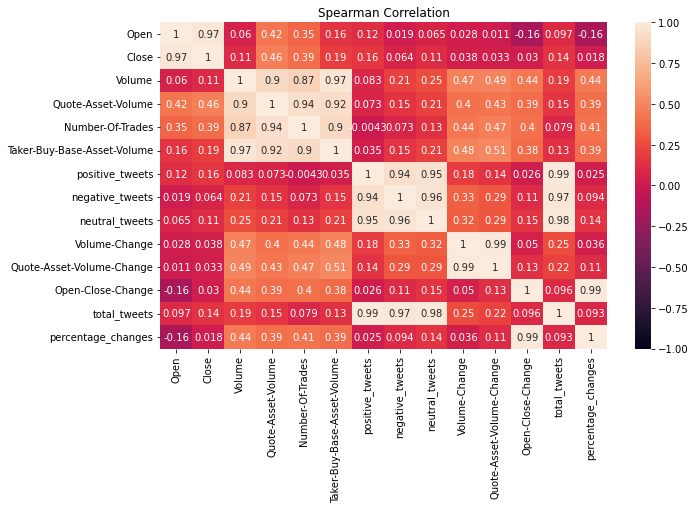

In [37]:
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

r_simple=display_correlation(df)

In [34]:
# pearsons correlation coefficient for linear relationship 
import numpy as np 

my_rho = np.corrcoef(df['positive_tweets'].loc[df['percentage_changes']>2], df['Open-Close-Change'].loc[df['percentage_changes']>2])

In [35]:
print(my_rho)

[[1.        0.2844881]
 [0.2844881 1.       ]]


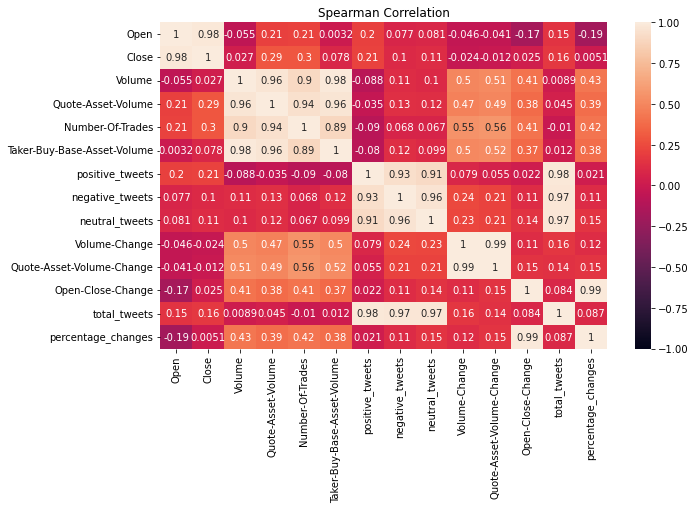

In [38]:
def display_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

r_simple=display_correlation(df)